In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

C:\Users\bikas\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from os import listdir
path = "data\\KDEF"
pathlist = listdir(path)

In [4]:
from shutil import copyfile
import os

for i in range(len(pathlist)):
    img_path = listdir(path+"\\"+pathlist[i])
    for j in range(len(img_path)):
        if(img_path[j][4:6]=="AF"):
            dst = "data\\AF"
        elif(img_path[j][4:6]=="AN"):
            dst = "data\\AN"
        elif(img_path[j][4:6]=="DI"):
            dst = "data\\DI"
        elif(img_path[j][4:6]=="HA"):
            dst = "data\\HA"
        elif(img_path[j][4:6]=="NE"):
            dst = "data\\NE"
        elif(img_path[j][4:6]=="SA"):
            dst = "data\\SA"
        elif(img_path[j][4:6]=="SU"):
            dst = "data\\SU"
        
        if not os.path.exists(dst):
            os.makedirs(dst)
        
        src = path+"\\"+pathlist[i]+"\\"+img_path[j]
        dst = dst + "\\" + img_path[j]
        try:
            copyfile(src, dst)
        except:
            pass

# Training with CNN

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical

from keras import models
from keras import layers

from keras import losses, optimizers, metrics


C:\Users\bikas\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = 'E:\\Datasets\\KDEF_and_AKDEF\\train'
test_dir ='E:\\Datasets\\KDEF_and_AKDEF\\test'


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size=32
)

Found 3918 images belonging to 7 classes.
Found 980 images belonging to 7 classes.


In [6]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 73984)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               9470080   
__________

In [8]:
model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy']
             )

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 123,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=30
)

Epoch 1/30
123/123 [==============================] - 31s 253ms/step - loss: 0.0480 - acc: 0.9844 - val_loss: 3.3904 - val_acc: 0.6021
Epoch 2/30
123/123 [==============================] - 27s 218ms/step - loss: 0.0338 - acc: 0.9901 - val_loss: 2.1064 - val_acc: 0.7063
Epoch 3/30
123/123 [==============================] - 27s 217ms/step - loss: 0.0268 - acc: 0.9919 - val_loss: 2.1047 - val_acc: 0.7094
Epoch 4/30
123/123 [==============================] - 27s 219ms/step - loss: 0.0175 - acc: 0.9942 - val_loss: 2.3483 - val_acc: 0.6719
Epoch 5/30
123/123 [==============================] - 27s 217ms/step - loss: 0.0216 - acc: 0.9939 - val_loss: 2.1623 - val_acc: 0.6937
Epoch 6/30
123/123 [==============================] - 27s 218ms/step - loss: 0.0173 - acc: 0.9954 - val_loss: 2.4664 - val_acc: 0.6729
Epoch 7/30
123/123 [==============================] - 27s 219ms/step - loss: 0.0127 - acc: 0.9964 - val_loss: 2.1986 - val_acc: 0.7156
Epoch 8/30
123/123 [==============================] - 2

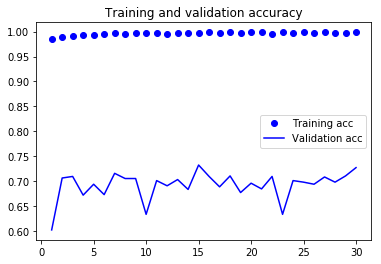

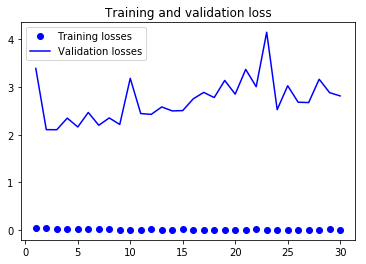

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Try using pretrined model

In [15]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))

In [16]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Dense(7, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 3591      
Total params: 18,913,095
Trainable params: 18,913,095
Non-trainable params: 0
_________________________________________________________________


In [17]:
conv_base.trainable = False
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

model.compile(
    optimizer=optimizers.Adam(lr=5e-5), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=123, 
                              epochs=15, 
                              validation_data=validation_generator, 
                              validation_steps=30)

This is the number of trainable weights before freezing the conv base: 4
Epoch 1/15
123/123 [==============================] - 34s 275ms/step - loss: 1.8234 - categorical_accuracy: 0.2741 - val_loss: 1.6751 - val_categorical_accuracy: 0.3438
Epoch 2/15
123/123 [==============================] - 32s 257ms/step - loss: 1.5063 - categorical_accuracy: 0.4329 - val_loss: 1.5098 - val_categorical_accuracy: 0.4156
Epoch 3/15
123/123 [==============================] - 28s 227ms/step - loss: 1.3227 - categorical_accuracy: 0.5310 - val_loss: 1.4436 - val_categorical_accuracy: 0.4813
Epoch 4/15
123/123 [==============================] - 28s 226ms/step - loss: 1.2023 - categorical_accuracy: 0.5889 - val_loss: 1.3455 - val_categorical_accuracy: 0.5042
Epoch 5/15
123/123 [==============================] - 32s 258ms/step - loss: 1.1124 - categorical_accuracy: 0.6296 - val_loss: 1.3274 - val_categorical_accuracy: 0.5177
Epoch 6/15
123/123 [==============================] - 32s 258ms/step - loss: 1.042

### Load model saved in this location

In [18]:
from keras.models import load_model
model = load_model('fc_pretrain.h5')
conv_base = model.layers[0]

model.summary()

OSError: Unable to open file (unable to open file: name = 'fc_pretrain.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [19]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [20]:
model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=125, 
                              epochs=15, 
                              validation_data=validation_generator, 
                              validation_steps=30)

Epoch 1/15
125/125 [==============================] - 34s 271ms/step - loss: 2.4976 - categorical_accuracy: 0.3641 - val_loss: 1.0899 - val_categorical_accuracy: 0.5740
Epoch 2/15
125/125 [==============================] - 32s 259ms/step - loss: 1.0050 - categorical_accuracy: 0.6265 - val_loss: 0.9247 - val_categorical_accuracy: 0.6219
Epoch 3/15
125/125 [==============================] - 32s 254ms/step - loss: 0.7083 - categorical_accuracy: 0.7412 - val_loss: 1.1068 - val_categorical_accuracy: 0.6510
Epoch 4/15
125/125 [==============================] - 32s 255ms/step - loss: 0.5556 - categorical_accuracy: 0.8059 - val_loss: 0.6337 - val_categorical_accuracy: 0.7802
Epoch 5/15
125/125 [==============================] - 32s 255ms/step - loss: 0.4163 - categorical_accuracy: 0.8506 - val_loss: 0.6564 - val_categorical_accuracy: 0.7698
Epoch 6/15
125/125 [==============================] - 31s 251ms/step - loss: 0.3499 - categorical_accuracy: 0.8808 - val_loss: 0.6103 - val_categorical_acc

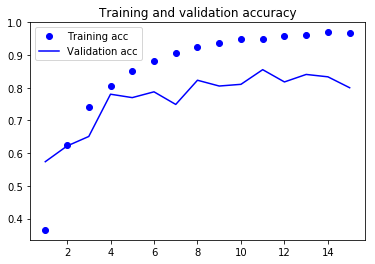

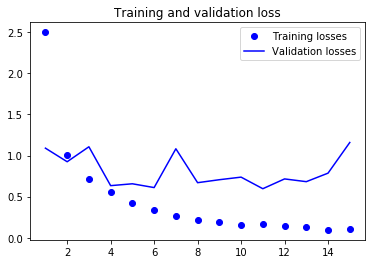

In [21]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save('fully_trained_model.h5')

In [1]:
from keras.models import load_model
model = load_model('fully_trained_model.h5')

Using TensorFlow backend.


# Test the model

In [29]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [59]:
labels = {
    0 : "Afraid",
    1 : "Angry",
    2 : "disgust",
    3 : "happy",
    4 : "neutral",
    5 : "sad",
    6 : "surprised"
}

In [54]:
image = cv2.imread('E:\\2.jpg')
image.shape

(370, 240, 3)

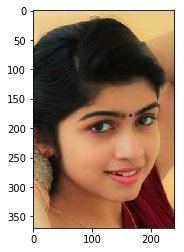

In [55]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [57]:
image=np.array(cv2.resize(image, (150,150)))
image = image.reshape(1, 150, 150, 3)
image.shape

(1, 150, 150, 3)

In [61]:
labels[np.argmax(model.predict(image))]

'happy'